<a href="https://colab.research.google.com/github/Katharina782/DraguhnLab_rotation/blob/main/BPNet_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [1]:
pip install pysam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 31.2 MB/s 


In [2]:
pip install pyBigWig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for pyBigWig: filename=pyBigWig-0.3.18-cp37-cp37m-linux_x86_64.whl size=196915 sha256=4c9f9b4e4041ecc65ced7ffdbe34c4dd61d783f3281a67abc592b015245346f0
  Stored in directory: /root/.cache/pip/wheels/28/eb/46/c761563ba38bd516bcc6accde3d4188cd84eec067f9201cbec
Successfully built pyBigWig


In [3]:
pip install pyranges

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 684 kB 26.0 MB/s 
     |████████████████████████████████| 470 kB 40.6 MB/s 
     |████████████████████████████████| 1.3 MB 41.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 425 kB 69.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyranges: filename=pyranges-0.0.117-py3-none-any.whl size=693480 sha256=3021767b01a6053688d69e4bf8c169fd01528f34bb89e34bb75e5055f6e88b35
  Stored in directory: /root/.cache/pip/wheels/1e/c2/29/66f7e4c0de384a3f525410e00111fb88afeb8fbdde3064526f
  Created wheel for ncls: filename=ncls-0.0.65-cp37-cp37m-linux_x86_64.whl size=1749170 sha256=40bb26ff7d4d10cb21a255d1fb2c8ae0a844e4c980a14840f3309c2102

In [22]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)


Mounted at /content/gdrive


# Import libraries

In [6]:
import pyranges as pr
import math
import seaborn as sns
import pandas as pd
import pyBigWig
import numpy as np

In [7]:
import pysam

In [8]:
#!wget -O /content/gdrive/MyDrive/regions.bed https://zenodo.org/record/4294904/files/regions.bed?download=1

In [9]:
#!wget -O /content/gdrive/MyDrive/test_data.tar.gz https://zenodo.org/record/3371216/files/data.tar.gz?download=1

# Download files

In [10]:
#!tar -xvf /content/gdrive/MyDrive/test_data.tar.gz -C /content/gdrive/MyDrive/colab_notebooks/data/


data/
data/merged_set/
data/merged_set/Sox2.training.bed.gz
data/merged_set/Oct4.training.bed.gz
data/merged_set/unique.training.bed.gz
data/merged_set/Nanog.training.bed.gz
data/chip-seq/
data/chip-seq/OSN.50-percent-overlap.tsv.gz
data/chip-seq/Oct4/
data/chip-seq/Oct4/counts.pos.bw
data/chip-seq/Oct4/idr-optimal-set.narrowPeak.gz
data/chip-seq/Oct4/idr-optimal-set.summit.bed.gz
data/chip-seq/Oct4/counts.neg.bw
data/chip-seq/input-control/
data/chip-seq/input-control/counts.pos.bw
data/chip-seq/input-control/counts.neg.bw
data/chip-seq/Sox2/
data/chip-seq/Sox2/counts.pos.bw
data/chip-seq/Sox2/idr-optimal-set.narrowPeak.gz
data/chip-seq/Sox2/idr-optimal-set.summit.bed.gz
data/chip-seq/Sox2/counts.neg.bw
data/chip-seq/Nanog/
data/chip-seq/Nanog/counts.pos.bw
data/chip-seq/Nanog/idr-optimal-set.narrowPeak.gz
data/chip-seq/Nanog/idr-optimal-set.summit.bed.gz
data/chip-seq/Nanog/counts.neg.bw
data/chip-nexus/
data/chip-nexus/OSN.50-percent-overlap.tsv.gz
data/chip-nexus/peaks-bak/
data/ch

In [11]:
#!tar -xvzf /content/gdrive/MyDrive/test_data.tar.gz

In [12]:
#!gzip -dv /content/data/chip-nexus/Sox2/idr-optimal-set.summit.bed.gz

SyntaxError: ignored

In [20]:
path = "/content/gdrive/MyDrive/colab_notebooks/data/"

# Input sequences

Maybe these regions were used for training. I found this file under https://zenodo.org/record/4294904#.YvYJu3ZBw2x. At the end of the script I describe another set of regions which could potentially also represent the input...

In [19]:
#!ls -l /content/gdrive/MyDrive/regions.bed

ls: cannot access '/content/gdrive/MyDrive/regions.bed': Transport endpoint is not connected


In [23]:
regions = pr.read_bed(f"{path}regions.bed")

In [24]:
regions.df[1000:1005]

,Chromosome,Start,End,Name
1000,chr1,3062442,3063442,Oct4
1001,chr1,21716595,21717595,Oct4
1002,chr1,187146201,187147201,Oct4
1003,chr1,176948522,176949522,Oct4
1004,chr1,176753568,176754568,Oct4


In [25]:
print(f"The region bed file has {len(regions.df)} rows, corresponding to regions")

The region bed file has 147974 rows, corresponding to regions


In [26]:
print(f"Each region is {regions.lengths()[0]}kb long. Assuming this is the data we were looking for.\n These regions were used as input for the model training.")

Each region is 1000kb long. Assuming this is the data we were looking for.
 These regions were used as input for the model training.


# Peaks

In the folder '/chip-nexus/peaks-bak/' there are bed files for each TF, with reads of lenth 201.  Here I had a look at the Sox2.bed file.
This has 9396 rows. Interestingly, this is the same number of rows as in the Sox2.training.bed in the folder "/merged_set".
What is the meaning of the Score values? Most of them are 1000. Is this a quality metric?


Additionally there is a 1kb.osnk.tsv.gz file.


In [30]:
#!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Sox2.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Sox2.bed.gz:	 70.9% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Sox2.bed


In [31]:
sox2 = pr.read_bed(f"{path}chip-nexus/peaks-bak/Sox2.bed")


In [33]:
print(f"The peaks.bed file for Sox2 has {len(sox2.df)} rows.")

The peaks.bed file for Sox2 has 9396 rows.


In [34]:
sox2.df.head(5)

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB,BlockCount
0,chr1,57780110,57780311,.,1000,.,23.32034,-1.0,-0.12406,168
1,chr1,9955253,9955454,.,1000,.,23.66639,-1.0,-0.13534,168
2,chr1,164745112,164745313,.,634,.,26.03992,-1.0,-0.21479,168
3,chr1,58762878,58763079,.,1000,.,27.04394,-1.0,-0.25005,168
4,chr1,172510905,172511106,.,977,.,27.30969,-1.0,-0.25951,168


In [35]:
# How wide are the peaks?
print(f"Width of each peak: {sox2.lengths()[0]}")

Width of each peak: 201


In [36]:
print(sox2.summary())

+-------+---------------+-----------------------+
|       |       pyrange |   coverage_unstranded |
|-------+---------------+-----------------------|
| count | 9396          |        9341           |
| mean  |  201          |         202.178       |
| std   |    0          |          15.3079      |
| min   |  201          |         201           |
| 25%   |  201          |         201           |
| 50%   |  201          |         201           |
| 75%   |  201          |         201           |
| max   |  201          |         402           |
| sum   |    1.8886e+06 |           1.88854e+06 |
+-------+---------------+-----------------------+
None


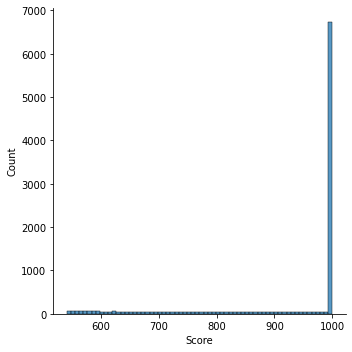

In [38]:
# Not sure what the meaning of the Score column is
sns.displot(sox2.df, x="Score")

In [40]:
df = sox2.df.sort_values(by="Chromosome")

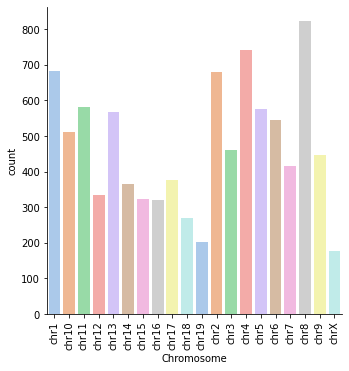

In [41]:
p = sns.catplot(x = "Chromosome", kind = "count", data = sox2.df, palette = "pastel")
p.set_xticklabels(rotation=90)


In [122]:
!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Nanog.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Nanog.bed.gz:	 66.1% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/Nanog.bed


In [124]:
len(pr.read_bed(f"{path}chip-nexus/peaks-bak/Nanog.bed").df)

18017

In [82]:
!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/1kb.osnk.tsv.gz

/content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/1kb.osnk.tsv.gz:	 86.6% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/peaks-bak/1kb.osnk.tsv


In [84]:
tsv_peaks=pd.read_csv(f'{path}chip-nexus/peaks-bak/1kb.osnk.tsv',sep='\t')


In [95]:
tsv_peaks.head()

,#chrom,start,end,task/Oct4,task/Sox2,task/Nanog,task/Klf4
0,chr1,10000,11000,0,0,0,0
1,chr1,11000,12000,0,0,0,0
2,chr1,12000,13000,0,0,0,0
3,chr1,13000,14000,0,0,0,0
4,chr1,14000,15000,0,0,0,0


In [93]:
tsv_peaks["task/Sox2"].sum()

10963

# Summit

This file contains the peak summit coordinates. Each entry has width 1. This has 11,000 rows. However, I am not sure how this corresponds to the Peak bed file for example.

In [48]:
#!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/Sox2/idr-optimal-set.summit.bed


/content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/Sox2/idr-optimal-set.summit.bed.gz:	 66.0% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/chip-nexus/Sox2/idr-optimal-set.summit.bed


In [49]:
sox2_summit = pr.read_bed(f"{path}chip-nexus/Sox2/idr-optimal-set.summit.bed")

In [50]:
len(sox2_summit)

10999

In [52]:
sox2_summit.df.head()

,Chromosome,Start,End
0,chr1,134535275,134535276
1,chr1,36986004,36986005
2,chr1,133340647,133340648
3,chr1,72793396,72793397
4,chr1,180924934,180924935


In [53]:
sox2_summit.lengths()[0]

1

# intersected set

In this folder there is one file TF.intepretation.tsv and TF.interpretation.bed.

I have no clue what this is supposed to be.

In [97]:
#!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/intersected_set/Sox2.interpretation.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/intersected_set/Sox2.interpretation.bed.gz:	 69.8% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/intersected_set/Sox2.interpretation.bed


In [99]:
inter = pr.read_bed(f"{path}intersected_set/Sox2.interpretation.bed")

In [100]:

inter.df.head()

,Chromosome,Start,End
0,chr1,3062400,3063400
1,chr1,3445600,3446600
2,chr1,4150600,4151600
3,chr1,4659800,4660800
4,chr1,4802200,4803200


In [103]:
len(inter.df)

7303

#

# Counts

There are bigWig files of positive and negative strand. BigWig format was originally intended for the use with genome browser tracks. From this dataformat we can retrieve original values for each base using the value() accessor. 



Apparently, these bigWig files are very sparse. Just one count for a single base pair. To find any values I chose regions from the regions.bed file. I don't really understand how these files are created. If we do Chip-nexus I would expect that adjacent bp should all have counts and that we should have more counts mapping to a base.

In [55]:
bw = pyBigWig.open(f"{path}chip-nexus/Sox2/counts.pos.bw")


In [56]:
# Dictionary of all chromosomes
bw.chroms()

{'chr1': 195471971,
 'chr10': 130694993,
 'chr11': 122082543,
 'chr12': 120129022,
 'chr13': 120421639,
 'chr14': 124902244,
 'chr15': 104043685,
 'chr16': 98207768,
 'chr17': 94987271,
 'chr18': 90702639,
 'chr19': 61431566,
 'chr1_GL456210_random': 169725,
 'chr1_GL456211_random': 241735,
 'chr1_GL456212_random': 153618,
 'chr1_GL456221_random': 206961,
 'chr2': 182113224,
 'chr3': 160039680,
 'chr4': 156508116,
 'chr4_GL456216_random': 66673,
 'chr4_GL456350_random': 227966,
 'chr4_JH584292_random': 14945,
 'chr4_JH584295_random': 1976,
 'chr5': 151834684,
 'chr5_GL456354_random': 195993,
 'chr5_JH584296_random': 199368,
 'chr5_JH584297_random': 205776,
 'chr5_JH584299_random': 953012,
 'chr6': 149736546,
 'chr7': 145441459,
 'chr8': 129401213,
 'chr9': 124595110,
 'chrUn_GL456239': 40056,
 'chrUn_GL456359': 22974,
 'chrUn_GL456360': 31704,
 'chrUn_GL456366': 47073,
 'chrUn_GL456367': 42057,
 'chrUn_GL456368': 20208,
 'chrUn_GL456370': 26764,
 'chrUn_GL456372': 28664,
 'chrUn_GL4563

In [57]:
bw.header()

{'maxVal': 11251,
 'minVal': 1,
 'nBasesCovered': 66966584,
 'nLevels': 10,
 'sumData': 70060402,
 'sumSquared': 3000601893,
 'version': 4}

In [58]:
bw.chroms()["chr1"]

195471971

In [61]:
test = bw.values("chr10", 0, 10000, numpy=True)# bw.chroms()["chr1"])
test

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [63]:
# this is a region from the input sequence
bw.values("chr1", 171033437, 171033437+1000, numpy=True)[0:500]

array([nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1., nan,  1., nan, nan, nan, nan, nan,  1., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  1., nan, nan, nan,  2., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, na

In [65]:
# this is a region from the input sequence
bw.values("chr1", 165641843, 165641843+1000, numpy=True)[0:500]

array([nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan,  1., nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,
       nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
       nan, nan, nan,  1.,  1., nan, nan, nan, nan, nan, nan,  1., nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# BAM

I am not sure what the entries of the BAM file mean. Maybe we could discuss this. 

In [68]:
samfile = pysam.AlignmentFile(f"{path}chip-nexus/Sox2/pool_filt.bam", "rb")


.fetch() function returns all reads overlapping a region sorted by the first aligned base in the reference sequence. Returns also reads that are only partially overlapping with a region. Fetching iterates over the rows of a multiple alignment. 

In [69]:
for read in samfile.fetch('chr2', 165641843, 165641860):
    print(read)
samfile.close()

CACGG_TGAC	0	#16	165641803	255	42M	*	0	0	GTCGGAGAAAAAGAGATGAGGCCAAAGGGCTTTGCCTTTTTT	array('B', [33, 37, 37, 33, 37, 33, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 33, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37])	[('XA', 0), ('MD', '42'), ('NM', 0)]
CTTAA_CTGA	16	#16	165641811	255	42M	*	0	0	AAAAGAGATGAGGCCAAAGGGCTTTGCCTTTTTTGCCGGGTT	array('B', [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 33, 37, 37, 37, 37, 37, 33, 37, 37, 37, 37, 37, 37, 37])	[('XA', 0), ('MD', '42'), ('NM', 0)]
CAAAT_GACT	16	#16	165641819	255	42M	*	0	0	TGAGGCCAAAGGGCTTTGCCTTTTTTGCCGGGTTTCAGAGTT	array('B', [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37])	[('XA', 0), ('MD', '42'), ('NM', 0)]
CCCCT_ACTG	0	#16	165641850	255	37M	*	0	0	GTTTCAGAGTTCTGAACCTAGATTCATCCCAAGACCC	array('B', [3

pileup() returns for each base in the reference genome the reads that map to that base. Pileup iterates over the columns of a multiple alignment. A multiple alignment could be interpreted as a stack of reads on top of the reference genome. 

In [71]:
samfile = pysam.AlignmentFile(f"{path}chip-nexus/Sox2/pool_filt.bam", "rb")

for pileupcolumn in samfile.pileup("chr1", 165641849, 165641850):
    print("\ncoverage at base %s = %s" % (pileupcolumn.pos, pileupcolumn.n))
    for pileupread in pileupcolumn.pileups:
        if not pileupread.is_del and not pileupread.is_refskip:
            # query position is None if is_del or is_refskip is set.
            print('\tbase in read %s = %s' %
                  (pileupread.alignment.query_name,
                   pileupread.alignment.query_sequence[pileupread.query_position]))

samfile.close()


coverage at base 165641793 = 1
	base in read TACGT_CTGA = C

coverage at base 165641794 = 1
	base in read TACGT_CTGA = C

coverage at base 165641795 = 1
	base in read TACGT_CTGA = A

coverage at base 165641796 = 2
	base in read TACGT_CTGA = A
	base in read GGCAA_CTGA = A

coverage at base 165641797 = 2
	base in read TACGT_CTGA = G
	base in read GGCAA_CTGA = G

coverage at base 165641798 = 2
	base in read TACGT_CTGA = C
	base in read GGCAA_CTGA = C

coverage at base 165641799 = 3
	base in read TACGT_CTGA = A
	base in read GGCAA_CTGA = A
	base in read TAAAG_ACTG = A

coverage at base 165641800 = 3
	base in read TACGT_CTGA = C
	base in read GGCAA_CTGA = C
	base in read TAAAG_ACTG = C

coverage at base 165641801 = 3
	base in read TACGT_CTGA = A
	base in read GGCAA_CTGA = A
	base in read TAAAG_ACTG = A

coverage at base 165641802 = 3
	base in read TACGT_CTGA = C
	base in read GGCAA_CTGA = C
	base in read TAAAG_ACTG = C

coverage at base 165641803 = 3
	base in read TACGT_CTGA = T
	base in r

# Predicted bigWig files

For the predictions I was expecting to see the same sequences as the input sequences. Furthermore, the probabilities for one sequence should add up to one. Maybe this is simply not normalized yet?

In [ ]:
#!wget -O /content/gdrive/MyDrive/Sox2.preds.pos.bw https://zenodo.org/record/4294904/files/Sox2.preds.pos.bw?download=1

In [72]:
bw_pred = pyBigWig.open("/content/gdrive/MyDrive/colab_notebooks/Sox2.preds.pos.bw")

In [73]:
bw_pred.chroms()

{'chr1': 195471971,
 'chr10': 130694993,
 'chr11': 122082543,
 'chr12': 120129022,
 'chr13': 120421639,
 'chr14': 124902244,
 'chr15': 104043685,
 'chr16': 98207768,
 'chr17': 94987271,
 'chr18': 90702639,
 'chr19': 61431566,
 'chr1_GL456210_random': 169725,
 'chr1_GL456211_random': 241735,
 'chr1_GL456212_random': 153618,
 'chr1_GL456213_random': 39340,
 'chr1_GL456221_random': 206961,
 'chr2': 182113224,
 'chr3': 160039680,
 'chr4': 156508116,
 'chr4_GL456216_random': 66673,
 'chr4_GL456350_random': 227966,
 'chr4_JH584292_random': 14945,
 'chr4_JH584293_random': 207968,
 'chr4_JH584294_random': 191905,
 'chr4_JH584295_random': 1976,
 'chr5': 151834684,
 'chr5_GL456354_random': 195993,
 'chr5_JH584296_random': 199368,
 'chr5_JH584297_random': 205776,
 'chr5_JH584298_random': 184189,
 'chr5_JH584299_random': 953012,
 'chr6': 149736546,
 'chr7': 145441459,
 'chr7_GL456219_random': 175968,
 'chr8': 129401213,
 'chr9': 124595110,
 'chrM': 16299,
 'chrUn_GL456239': 40056,
 'chrUn_GL456359

In [75]:
bw.values("chr1", 171033437, 171033437+1000, numpy=True)[0:100]

array([nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1., nan,  1., nan, nan, nan, nan, nan,  1., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

I was expecting that if we get the predictions for a particular input region, than it should sum to one.

In [76]:
x = bw_pred.values("chr1", 171033437, 171033437+1000, numpy=True)
x[0:100]

array([0.00885102, 0.00794259, 0.00906108, 0.0110996 , 0.00916057,
       0.01153745, 0.01080983, 0.01163372, 0.00989056, 0.02006298,
       0.01544945, 0.01021632, 0.0051413 , 0.00597938, 0.01580837,
       0.01984632, 0.02036148, 0.02202081, 0.02256774, 0.02023123,
       0.01159393, 0.01061111, 0.00784227, 0.00736755, 0.01093887,
       0.00820192, 0.00379759, 0.00604574, 0.00508476, 0.01156421,
       0.00753225, 0.00444663, 0.00383838, 0.01109663, 0.00727801,
       0.00650276, 0.01276037, 0.0241713 , 0.01811267, 0.00706555,
       0.0049176 , 0.00429775, 0.00971882, 0.0131268 , 0.01609014,
       0.02397524, 0.02202256, 0.0322405 , 0.01878972, 0.01061762,
       0.00517919, 0.01449243, 0.0207858 , 0.01278876, 0.00764939,
       0.01756865, 0.01617804, 0.02279634, 0.01864478, 0.01754705,
       0.01356106, 0.0137598 , 0.01376605, 0.01723405, 0.01901769,
       0.01714451, 0.01399285, 0.00783024, 0.0109409 , 0.01604538,
       0.00743694, 0.00825588, 0.00416892, 0.00982812, 0.01565

In [77]:
x.sum()

18.888515

In [78]:
b = bw_pred.values("chr1", 165641843, 165641843+1000, numpy=True)
b.sum()

18.233421

In [79]:
c = bw_pred.values("chr1", 176753568, 176753568+1000, numpy=True)
c.sum()

11.538993

In [81]:
# The predictions are nan just as for the original bigWig files...
bw_pred.values("chr1", 0, 100, numpy=True)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

# Merged set


Here there is one file for Nanog, Oct4 and Sox2, but not Klf4 and one file called "unique". I am not sure whether these are the sequences that were used for training or whether the regions in the file "regions.bed" from above were used for training. 

In [104]:
!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/merged_set/Sox2.training.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/merged_set/Sox2.training.bed.gz:	 75.8% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/merged_set/Sox2.training.bed


In [105]:
sox2_train = pr.read_bed(f"{path}merged_set/Sox2.training.bed")

In [117]:

sox2_train.df.head()

,Chromosome,Start,End,Name
0,chr1,3062400,3063400,1.0
1,chr1,3445600,3446600,1.0
2,chr1,3482400,3483400,1.0
3,chr1,3953200,3954200,1.0
4,chr1,3981600,3982600,1.0


In [106]:
len(sox2.df)

9396

In [109]:
sox2_train_df = sox2_train.df.sort_values(["Chromosome", "Start"]).head()

In [114]:
pd.unique(sox2_train_df["Chromosome"].values)

['chr1']
Categories (21, object): ['chr1', 'chr10', 'chr11', 'chr12', ..., 'chr8', 'chr9', 'chrX', 'chrY']


In [115]:
# select only Sox2 regions
#df.loc[df['col1'] == value]
df = regions.df.loc[regions.df["Name"] == "Sox2"]
df = df.sort_values(["Chromosome", "Start"])
df.head()

,Chromosome,Start,End,Name
1868,chr1,3062450,3063450,Sox2
2105,chr1,3445600,3446600,Sox2
1867,chr1,4150519,4151519,Sox2
2283,chr1,4659763,4660763,Sox2
1763,chr1,4802191,4803191,Sox2


In [116]:

len(df)

10740

In [ ]:
df.End[142054] - df.Start[142054]

In [ ]:
regions.df.Chromosome.unique()

### Nanog.training.bed

Here the number of rows is not equivalent to the number of rows in the peak file (as was the case for Sox2)

In [125]:
!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/merged_set/Nanog.training.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/merged_set/Nanog.training.bed.gz:	 77.7% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/merged_set/Nanog.training.bed


In [126]:
nanog_train = pr.read_bed(f"{path}merged_set/Nanog.training.bed")
len(nanog_train.df)

66982

### Unique.training.bed

In [118]:
!gzip -dv /content/gdrive/MyDrive/colab_notebooks/data/merged_set/unique.training.bed.gz

/content/gdrive/MyDrive/colab_notebooks/data/merged_set/unique.training.bed.gz:	 74.5% -- replaced with /content/gdrive/MyDrive/colab_notebooks/data/merged_set/unique.training.bed


In [119]:
unique_train = pr.read_bed(f"{path}merged_set/unique.training.bed")

In [120]:

len(unique_train)

85926